-----------
Initializing structure...
Halving computational cell along direction y
time for choose_chunkdivision = 0.00169992 s
Working in 2D dimensions.
Computational cell is 40 x 40 x 0 with resolution 10
     block, center = (0,0,0)
          size (40,40,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
     block, center = (0,0,0)
          size (34,34,0)
          axes (1,0,0), (0,1,0), (0,0,1)
          dielectric constant epsilon diagonal = (1,1,1)
time for set_epsilon = 0.20424 s
time for set_conductivity = 0.00643587 s
time for set_conductivity = 0.0124679 s
time for set_conductivity = 0.00598598 s
-----------


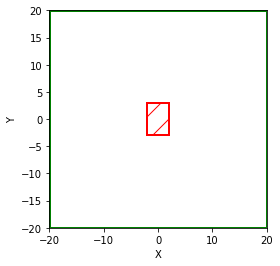

In [82]:
import numpy as np
import matplotlib.pyplot as plt
import meep as mp
import subprocess

import sys
sys.path.append('../../lib')
import meep_nb as mpnb

sx = 40
sy = sx
cell_size = mp.Vector3(sx,sy,0)
shell_thick = 3

shell = [mp.Block(cell_size, center=mp.Vector3(0, 0), material=mp.Medium(D_conductivity=1e3)),
         mp.Block(mp.Vector3(sx-shell_thick*2, sy-shell_thick*2), center=mp.Vector3(0, 0), material=mp.air)]
# charged = mp.Block(mp.Vector3)

charge_source = [mp.Source(mp.ContinuousSource(frequency=1e-10, width=500),
                           amplitude=x if x != 0 else 1,
                         component=mp.Ez,
                         center=mp.Vector3(x, 0),
                         size=mp.Vector3(4, 6)) for x in [0]]

dpml = .1
pml_layers = [mp.PML(thickness=dpml)]

symmetries = [mp.Mirror(direction=mp.Y)]

sim = mp.Simulation(resolution=10,
                    cell_size=cell_size,
                    geometry=shell,
#                     default_material=mp.Medium(index=1.5),
                    sources=charge_source,
                    symmetries=symmetries,
                    boundary_layers=pml_layers
                   )
sim.plot2D()

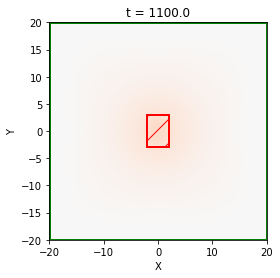

run 3 finished at t = 1100.0 (22000 timesteps)


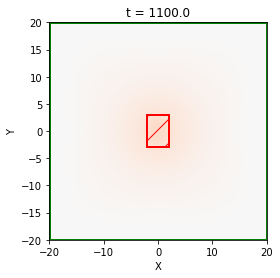

In [84]:
def livefield(sim):
    mpnb.liveplot(sim, mp.Ez)
    
sim.reset_meep()
sim.run(mp.at_beginning(livefield),
        #mp.at_every(10, livefield),
        until=1000)
sim.run(#mp.at_beginning(livefield),
        mp.at_every(2, livefield),
        until=100)